In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
   #     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
meta_data = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
meta_data.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [3]:
di_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
di_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
image_dir='/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [5]:
di_data['SeriesDescription'].unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [6]:
di_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [7]:
#Filtering dataset based on Series Description to extract specific types of images
cropped_images=di_data[di_data.SeriesDescription=='cropped images'].image_path
full_mammo_images=di_data[di_data.SeriesDescription=='full mammogram images'].image_path
ROI_mask_images=di_data[di_data.SeriesDescription=='ROI mask images'].image_path

In [8]:
#Updating the paths of the di_data images 
cropped_images=cropped_images.replace('CBIS-DDSM/jpeg',image_dir, regex=True)
full_mammo_images=full_mammo_images.replace('CBIS-DDSM/jpeg',image_dir,regex=True)
ROI_mask_images=ROI_mask_images.replace('CBIS-DDSM/jpeg',image_dir,regex=True)

In [9]:
# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo_images.iloc[0])
print('ROI Mask Images paths:\n')
print(ROI_mask_images.iloc[0])

Cropped Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [10]:
#Creating dictionaries where the keys are derived from the paths of the di_data images, where the path is split be /.
full_mammo_images_dict=dict()
cropped_images_dict=dict()
ROI_mask_images_dict=dict()

for data1 in full_mammo_images:
    key=data1.split("/")[5]
    full_mammo_images_dict[key]=data1 
for data1 in cropped_images:
    key=data1.split("/")[5]
    cropped_images_dict[key]=data1   
for data1 in ROI_mask_images:
    key=data1.split("/")[5]
    ROI_mask_images_dict[key]=data1 
    
    
    
# view keys
next(iter((full_mammo_images_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [11]:
cal_test_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')
cal_test_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [12]:
cal_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [13]:
mass_test_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')
mass_test_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [14]:
mass_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

In [15]:
mass_test_data.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [16]:
print(mass_test_data.shape)

(378, 14)


In [17]:
cal_train_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
cal_train_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
cal_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [19]:
mass_train_data=pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [20]:
mass_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [21]:
mass_train_data.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [22]:
print(mass_train_data.shape)

(1318, 14)


In [23]:
mass_train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [24]:
#Update specific columns in a dataset based on mappings stored in previously defined dictionaries

def fix_image_path(data):
    for i, img in enumerate(data.values):
        img_name=img[11].split("/")[2]
        data.iloc[i,11]=full_mammo_images_dict[img_name]
            
        img_name=img[12].split("/")[2]
        data.iloc[i,12]=cropped_images_dict[img_name]
        
        img_name=img[13].split("/")[2]
        data.iloc[i,13]=ROI_mask_images_dict[img_name]

In [25]:
#Applying the function defined above to update the images in the mass datasets
fix_image_path(mass_test_data)
fix_image_path(mass_train_data)

In [26]:
mass_train_data

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...,/kaggle/input/cbis-ddsm-breast-cancer-image-da...


In [27]:
mass_test=mass_test_data.rename(columns={'left or right breast':'left_or_right_breast',
'image view':'image_view','abnormality id':'abnormality_id','mass shape':'mass_shape',
'mass margins':'mass_margins','image file path':'image_file_path',
'cropped image file path':'cropped_image_file_path',
'ROI mask file path':'ROI_mask_file_path'})

In [28]:
mass_train=mass_train_data.rename(columns={'left or right breast':'left_or_right_breast',
'image view':'image_view','abnormality id':'abnormality_id','mass shape':'mass_shape',
'mass margins':'mass_margins','image file path':'image_file_path',
'cropped image file path':'cropped_image_file_path',
'ROI mask file path':'ROI_mask_file_path'})

In [29]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [30]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [31]:
# Display some images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
     
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Full Mammograms:



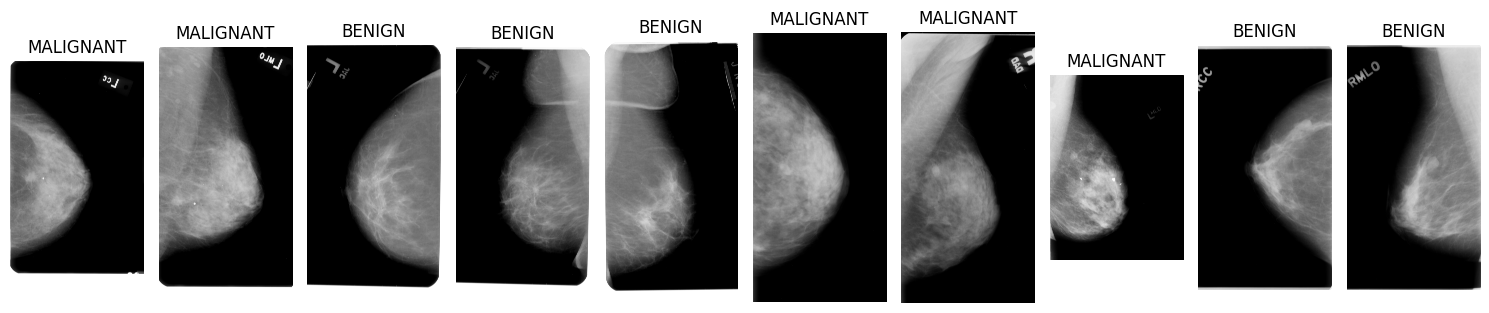

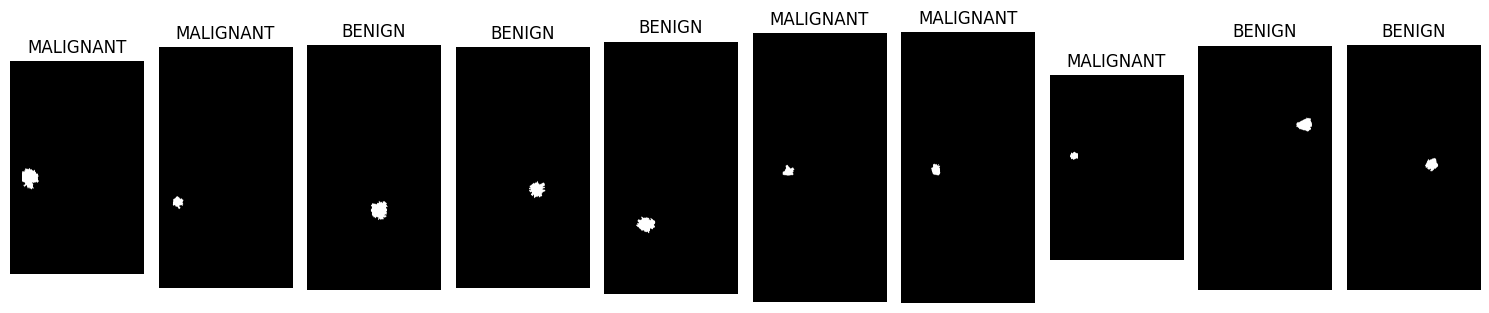

In [32]:
print('Full Mammograms:\n')
display_images('image_file_path', 10)
#print('Cropped Mammograms:\n')
#display_images('cropped_image_file_path', 5)
#print('Cropped Mammograms:\n')
display_images('ROI_mask_file_path', 10)

In [33]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Cropping2D
from tensorflow.keras.optimizers import Adam

2024-09-30 10:13:59.503022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 10:13:59.503138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 10:13:59.637782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
def preprocess_image(image_path):
    """Load and resize image to 255x255."""
    image = Image.open(image_path)
    image = image.resize((255, 255))
    image = np.array(image) / 255.0  # Normalize to [0, 1]
    return image

In [35]:
def display_images(df, column, number):
    """Displays images in dataset."""
    number_to_visualize = number
    rows = 1 
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    for index, row in df.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = preprocess_image(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [36]:
# Preprocess the images and masks
mass_train['image_array'] = mass_train['image_file_path'].apply(preprocess_image)
mass_train['mask_array'] = mass_train['ROI_mask_file_path'].apply(preprocess_image)

mass_test['image_array'] = mass_test['image_file_path'].apply(preprocess_image)
mass_test['mask_array'] = mass_test['ROI_mask_file_path'].apply(preprocess_image)

In [37]:
# Convert the lists to numpy arrays
train_full_images = np.array(mass_train['image_array'].tolist())
train_roi_masks = np.array(mass_train['mask_array'].tolist())
test_full_images = np.array(mass_test['image_array'].tolist())
test_roi_masks = np.array(mass_test['mask_array'].tolist())

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, ZeroPadding2D
from tensorflow.keras.optimizers import Adam

In [39]:
# Step 4: Define U-Net model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, ZeroPadding2D
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [40]:
#import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [41]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [42]:
def unet_model(input_size=(255, 255, 1)):
    inputs = Input(input_size)

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    up6 = ZeroPadding2D(((1, 0), (1, 0)))(up6)  # Padding to match the shape
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    up7 = ZeroPadding2D(((1, 0), (1, 0)))(up7)  # Padding to match the shape
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = UpSampling2D(size=(2, 2))(conv7)
    up8 = ZeroPadding2D(((1, 0), (1, 0)))(up8)  # Padding to match the shape
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = UpSampling2D(size=(2, 2))(conv8)
    up9 = ZeroPadding2D(((1, 0), (1, 0)))(up9)  # Padding to match the shape
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [43]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [44]:
from tensorflow.keras.mixed_precision import Policy, set_global_policy

policy = Policy('mixed_float16')
set_global_policy(policy)

strategy = tf.distribute.MirroredStrategy()

In [45]:
with strategy.scope():
    unet = unet_model()

train_dataset = tf.data.Dataset.from_tensor_slices((train_full_images, train_roi_masks))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(8).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_full_images, test_roi_masks))
test_dataset = test_dataset.batch(8).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

history = unet.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 92s 371ms/step - accuracy: 0.9932 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - accuracy: 0.9938 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.9938 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.9940 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.9939 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 0.9937 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 45s 263ms/step - accuracy: 0.9941 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 45s 262ms/step - accuracy: 0.9941 - loss: nan - val_accuracy: 0.9941 - val_loss: nan


In [46]:
unet.evaluate(test_full_images, test_roi_masks)

12/12 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9939 - loss: nan


[nan, 0.9940899014472961]

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images_with_masks(images, true_masks, predicted_masks, indices):
    """Displays the full mammogram, given mask, and predicted mask for multiple examples."""
    n = len(indices)
    fig, axes = plt.subplots(n, 3, figsize=(15, 5 * n))

    for i, index in enumerate(indices):
        image = images[index]
        true_mask = true_masks[index]
        predicted_mask = predicted_masks[i]  # predicted_masks is already batched

        # Display the full mammogram
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].set_title('Full Mammogram')
        axes[i, 0].axis('off')

        # Display the given mask
        axes[i, 1].imshow(true_mask, cmap='gray')
        axes[i, 1].set_title('Given Mask')
        axes[i, 1].axis('off')

        # Display the predicted mask
        axes[i, 2].imshow(predicted_mask, cmap='gray')
        axes[i, 2].set_title('Predicted Mask')
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


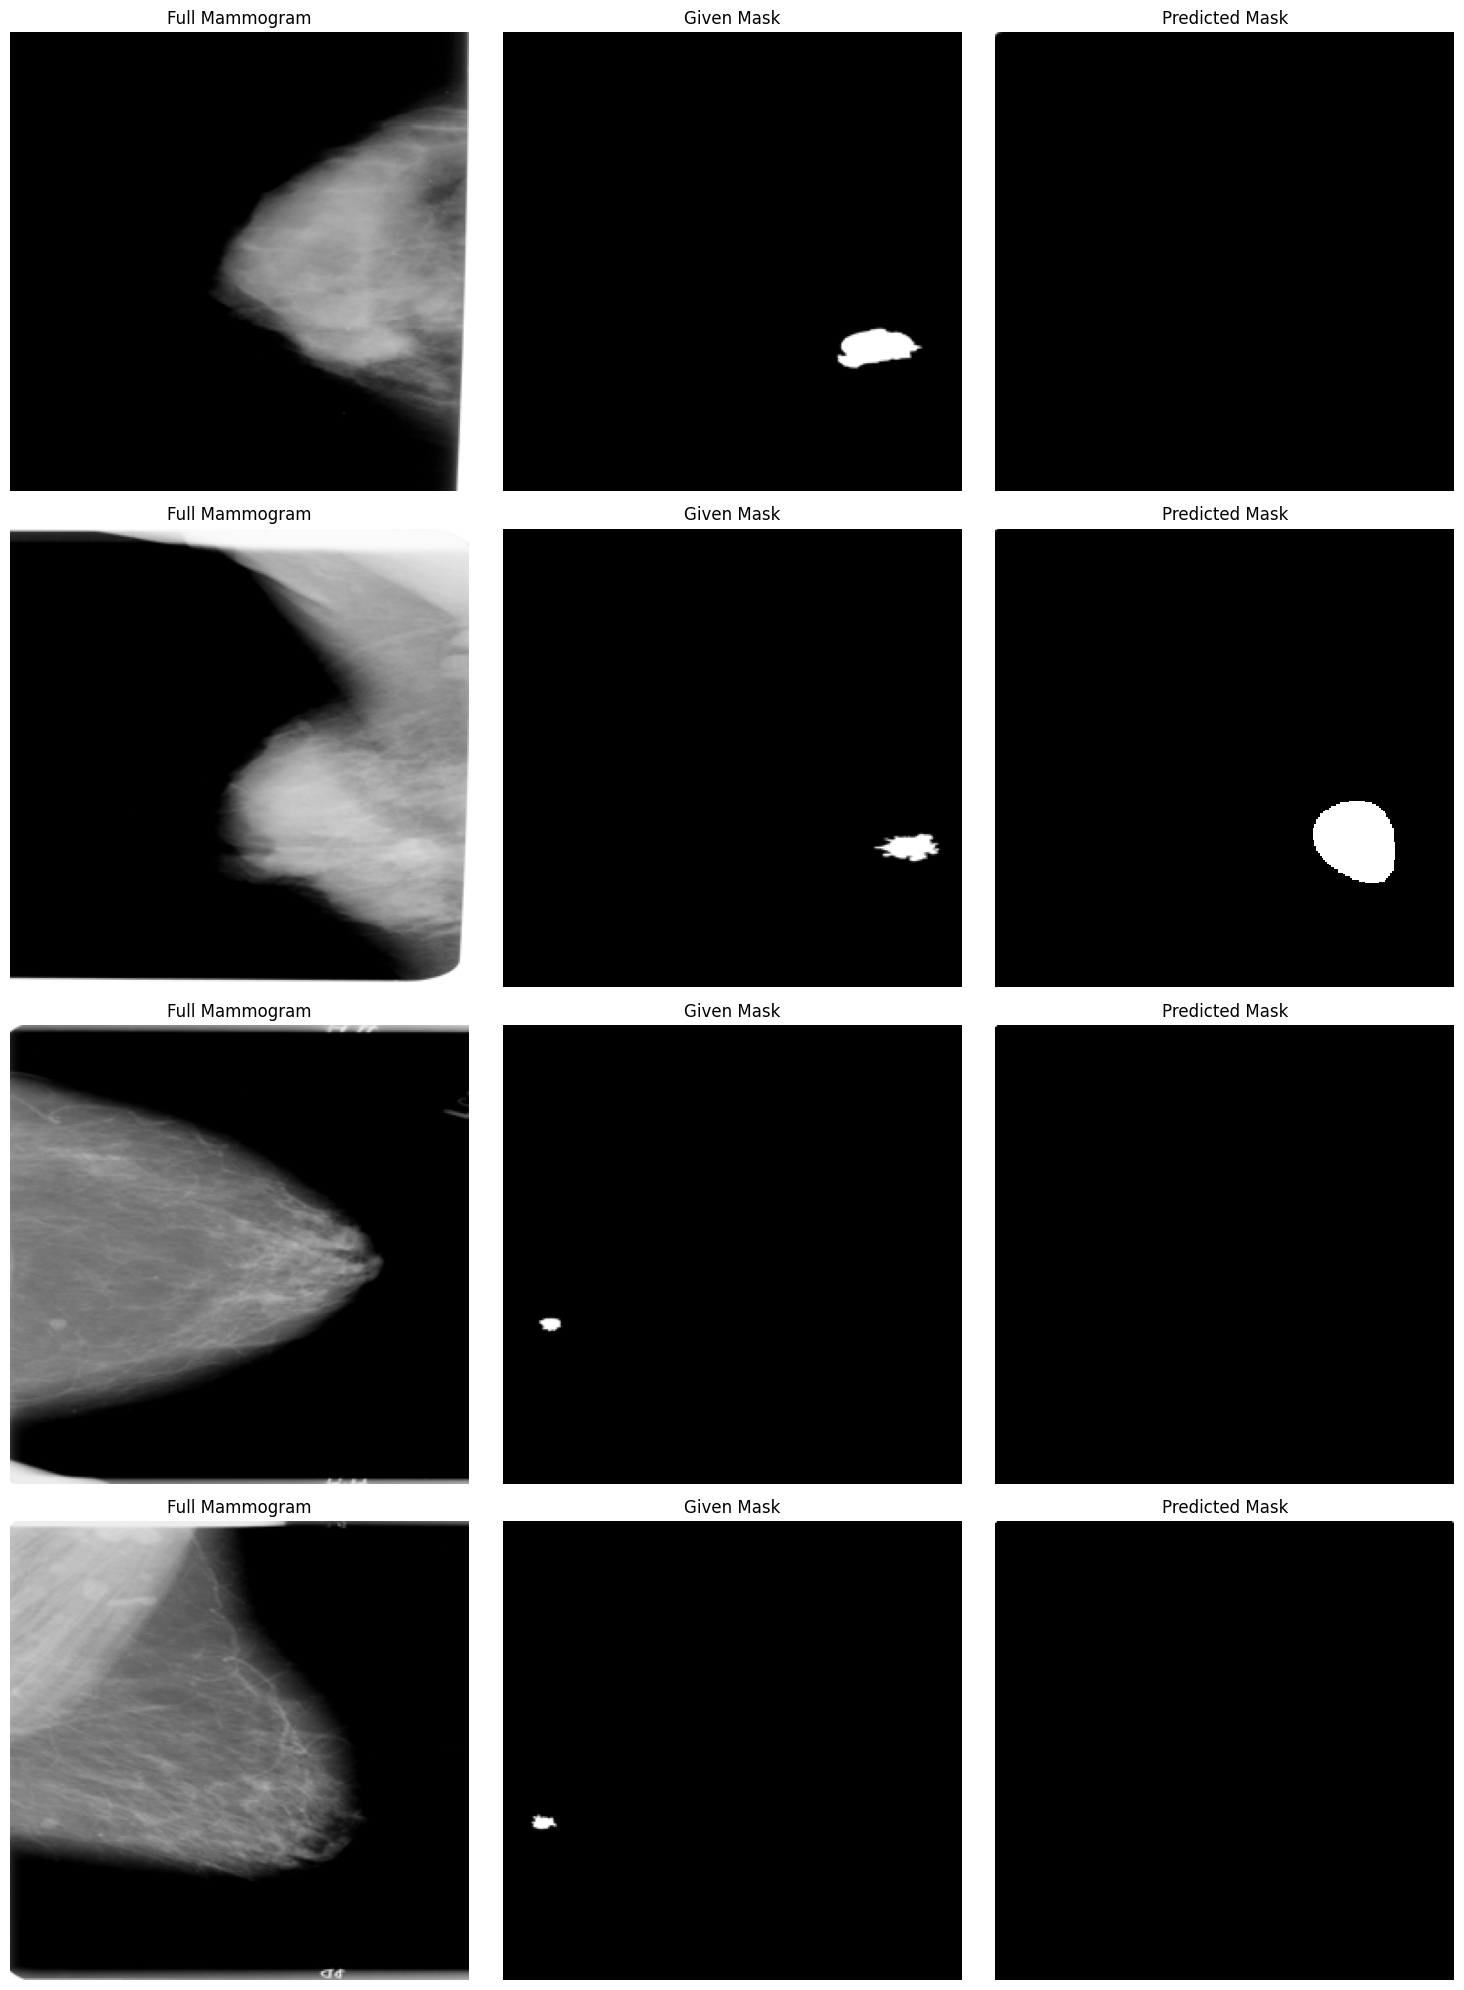

In [48]:
# Select indices for visualization
indices = [0, 1, 2, 3]  # Change these indices to visualize different examples

# Prepare images and true masks
selected_images = [test_full_images[index] for index in indices]
selected_true_masks = [test_roi_masks[index] for index in indices]

# Resize images and masks to the input size of the model (255x255)
resized_images = [np.resize(image, (255, 255, 1)) for image in selected_images]
resized_true_masks = [np.resize(mask, (255, 255, 1)) for mask in selected_true_masks]

# Predict masks
resized_images_array = np.array(resized_images)
predicted_masks = unet.predict(resized_images_array)
predicted_masks = np.squeeze(predicted_masks, axis=-1)  # Remove the channel dimension

# Display the images
display_images_with_masks(selected_images, selected_true_masks, predicted_masks, indices)


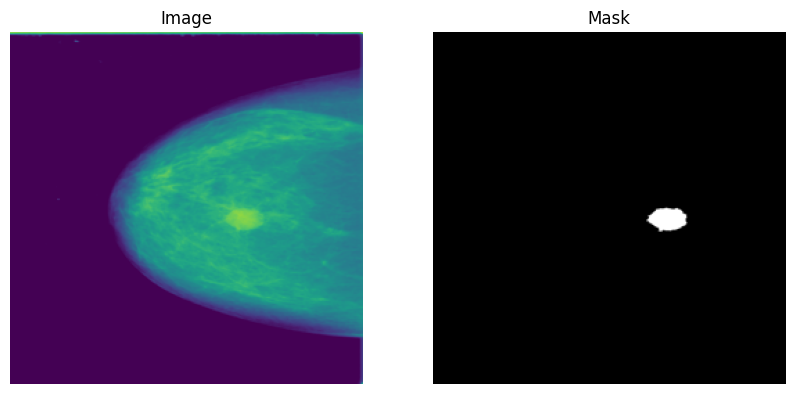

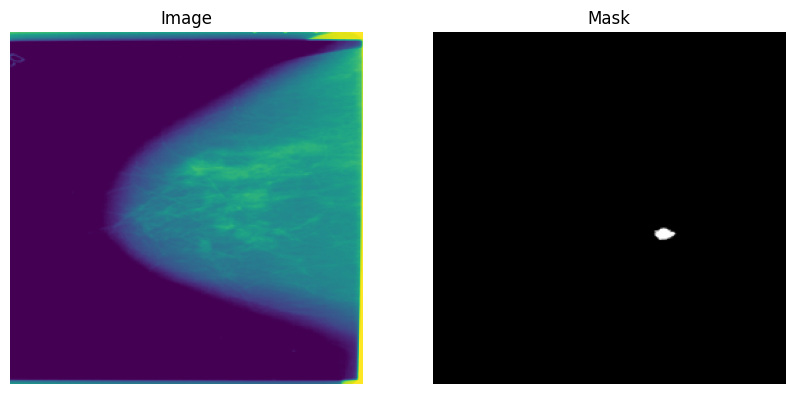

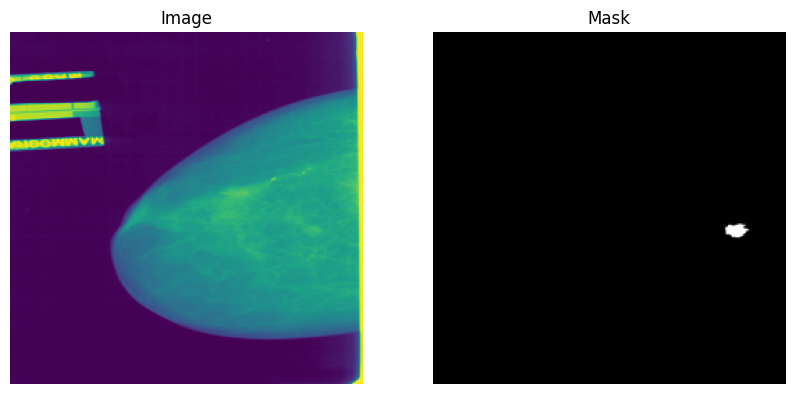

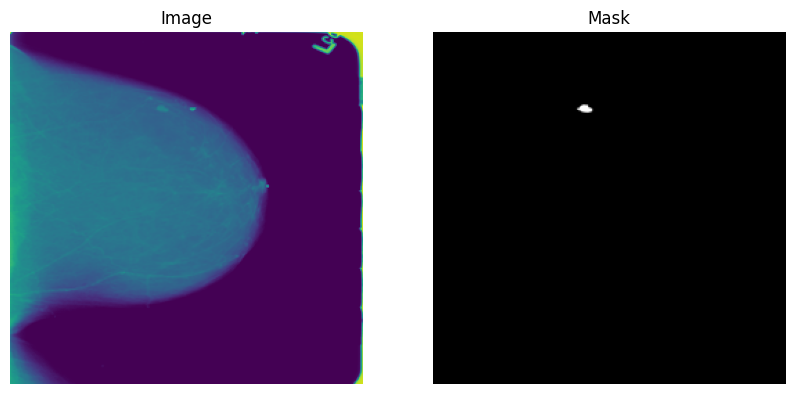

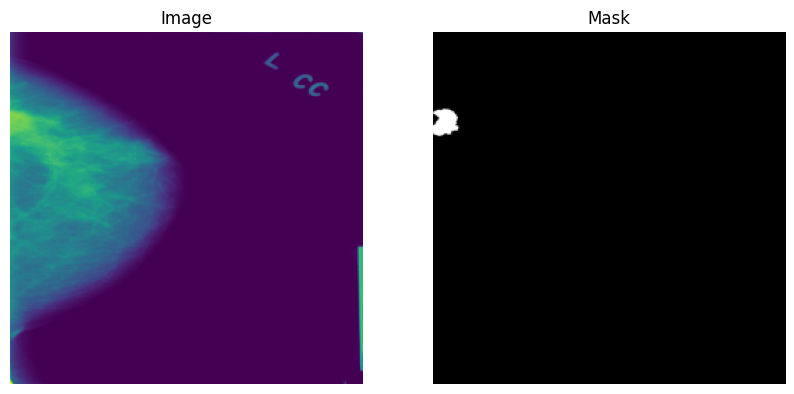

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Preprocessing function to load and resize images
def preprocess_image(image_path):
    """Load and resize image to 255x255."""
    try:
        image = Image.open(image_path)
        image = image.resize((255, 255))
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Function to display images
def display_images(df, column, number):
    """Displays images in dataset."""
    number_to_visualize = number
    rows = 1 
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    for index, row in df.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = preprocess_image(image_path)
        if image is not None:
            ax = axes[index]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()


# Preprocess the images and masks
mass_train['image_array'] = mass_train['image_file_path'].apply(preprocess_image)
mass_train['mask_array'] = mass_train['ROI_mask_file_path'].apply(preprocess_image)
mass_test['image_array'] = mass_test['image_file_path'].apply(preprocess_image)
mass_test['mask_array'] = mass_test['ROI_mask_file_path'].apply(preprocess_image)

# Filter out any rows where preprocessing failed
mass_train = mass_train.dropna(subset=['image_array', 'mask_array'])
mass_test = mass_test.dropna(subset=['image_array', 'mask_array'])

# Convert the lists to numpy arrays
train_full_images = np.array(mass_train['image_array'].tolist())
train_roi_masks = np.array(mass_train['mask_array'].tolist())
test_full_images = np.array(mass_test['image_array'].tolist())
test_roi_masks = np.array(mass_test['mask_array'].tolist())

# Function to create TensorFlow datasets
def create_tf_dataset(images, masks):
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(32)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Create TensorFlow datasets
train_dataset = create_tf_dataset(train_full_images, train_roi_masks)
test_dataset = create_tf_dataset(test_full_images, test_roi_masks)

# Function to display sample images and masks
def display_sample(image, mask):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Display sample images and masks from the training dataset
for images, masks in train_dataset.take(1):
    for i in range(5):  # Display 5 samples
        display_sample(images[i].numpy(), masks[i].numpy())


In [50]:

model = unet_model()
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 255, 255,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 255, 255,  │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 127, 127,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 127, 127,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 127, 127,  │    147,584 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 63, 63,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 63, 63,    │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 63, 63,    │    590,080 │ conv2d_23[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 31, 31,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 31, 31,    │  1,180,160 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 31, 31,    │  2,359,808 │ conv2d_25[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 15, 15,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 15, 15,    │  4,719,616 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 15, 15,    │  9,438,208 │ conv2d_27[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 30, 30,    │          0 │ conv2d_28[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 31, 31,    │          0 │ up_sampling2d_4[

 Total params: 31,377,793 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20


2024-09-30 10:38:10.867803: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng19{} for conv (f16[512,1536,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f16[32,1536,31,31]{3,2,1,0}, f16[32,512,31,31]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-09-30 10:38:10.912097: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.044400595s
Trying algorithm eng19{} for conv (f16[512,1536,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f16[32,1536,31,31]{3,2,1,0}, f16[32,512,31,31]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-09-30 10:38:15.264601: E ext

42/42 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.9940 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 721ms/step - accuracy: 0.9940 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 721ms/step - accuracy: 0.9938 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 717ms/step - accuracy: 0.9939 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 721ms/step - accuracy: 0.9939 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 722ms/step - accuracy: 0.9940 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 722ms/step - accuracy: 0.9940 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 721ms/step - accuracy: 0.9938 - loss: nan - val_accuracy: 0.9941 - val_loss: nan
Epoch 9/20
42/42 ━━━━━━━━━━━━

In [52]:
model.evaluate(test_dataset)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.9942 - loss: nan


[nan, 0.9940780401229858]

In [53]:
###########model.save('/kaggle/working/my_model.h5')


In [54]:
model.save('/kaggle/working/my_model.h5')


In [55]:
def create_tf_dataset(images, masks, batch_size=8):  # Reduce batch size
    dataset = tf.data.Dataset.from_tensor_slices((images, masks))
    dataset = dataset.shuffle(buffer_size=len(images))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Create TensorFlow datasets with reduced batch size
train_dataset = create_tf_dataset(train_full_images, train_roi_masks)
test_dataset = create_tf_dataset(test_full_images, test_roi_masks)

In [56]:
def preprocess_image(image_path):
    """Load and resize image to 255x255."""
    try:
        image = Image.open(image_path)
        image = image.resize((128, 128))  # Reduce image size
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Preprocess the images and masks with reduced image size
mass_train['image_array'] = mass_train['image_file_path'].apply(preprocess_image)
mass_train['mask_array'] = mass_train['ROI_mask_file_path'].apply(preprocess_image)
mass_test['image_array'] = mass_test['image_file_path'].apply(preprocess_image)
mass_test['mask_array'] = mass_test['ROI_mask_file_path'].apply(preprocess_image)

# Filter out any rows where preprocessing failed
mass_train = mass_train.dropna(subset=['image_array', 'mask_array'])
mass_test = mass_test.dropna(subset=['image_array', 'mask_array'])

# Convert the lists to numpy arrays
train_full_images = np.array(mass_train['image_array'].tolist())
train_roi_masks = np.array(mass_train['mask_array'].tolist())
test_full_images = np.array(mass_test['image_array'].tolist())
test_roi_masks = np.array(mass_test['mask_array'].tolist())

# Create TensorFlow datasets
train_dataset = create_tf_dataset(train_full_images, train_roi_masks)
test_dataset = create_tf_dataset(test_full_images, test_roi_masks)

In [58]:
from IPython.display import FileLink
FileLink(r'my_model.h5')

/kaggle/working/my_model.h5

In [57]:
from tensorflow.keras.mixed_precision import experimental as mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)

ImportError: cannot import name 'experimental' from 'tensorflow.keras.mixed_precision' (/opt/conda/lib/python3.10/site-packages/keras/_tf_keras/keras/mixed_precision/__init__.py)